## Importing

In [7]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 

df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

In [8]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace=True)

# add total column
df_can['Total'] = df_can.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


## Pie Charts

In [19]:
# group countries by continents and apply sum() function 
df_continents = df_can.groupby('Continent', axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(df_can.groupby('Continent', axis=0)))

df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


autopct - is a string or function used to label the wedges with their numeric value. The label will be placed inside the wedge. If it is a format string, the label will be fmt%pct.
startangle - rotates the start of the pie chart by angle degrees counterclockwise from the x-axis.
shadow - Draws a shadow beneath the pie (to give a 3D feel).
labels - turn off labels on pie chart
pct -  the ratio between the center of each pie slice and the start of the text generated by autopct
color - Pass in a custom set of colors for continents by passing in colors parameter.
Explode the pie chart to emphasize the lowest three continents (Africa, North explode - America, and Latin America and Carribbean) by pasing in explode parameter.

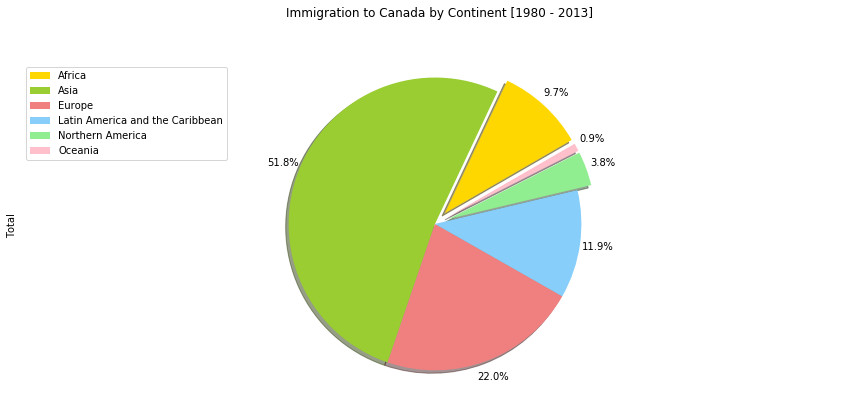

In [65]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.


df_continents['Total'].plot(kind='pie',
                           figsize=(15,6),
                           autopct='%1.1f%%',
                           startangle=30,
                           shadow=True, 
                           labels=None,
                           pctdistance=1.12,
                           colors=colors_list,
                           explode=explode_list)

plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 
plt.legend(labels=df_continents.index, loc='upper left')
plt.axis('equal') 

plt.show()

## Box Plots

A box plot is a way of statistically representing the distribution of the data through five main dimensions:

Minimun: Smallest number in the dataset.
First quartile: Middle number between the minimum and the median.
Second quartile (Median): Middle number of the (sorted) dataset.
Third quartile: Middle number between median and maximum.
Maximum: Highest number in the dataset.

In [68]:
df_japan = df_can.loc[['Japan'], years].transpose()

df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


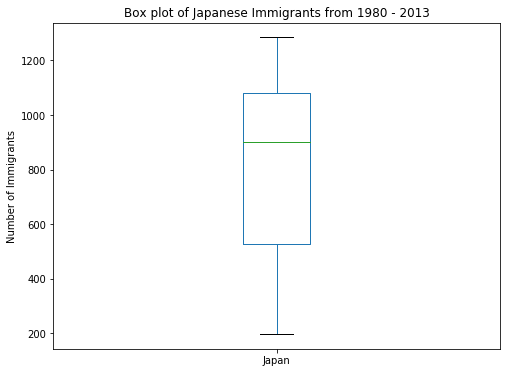

In [77]:
df_japan.plot(kind='box', figsize=(8, 6)) #vert=False for horizontal box plot

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

The minimum number of immigrants is around 200 (min), maximum number is around 1300 (max), and median number of immigrants is around 900 (median).
25% of the years for period 1980 - 2013 had an annual immigrant count of ~500 or fewer (First quartile).
75% of the years for period 1980 - 2013 had an annual immigrant count of ~1100 or fewer (Third quartile).

In [75]:
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


Subplots

Often times we might want to plot multiple plots within the same figure. For example, we might want to perform a side by side comparison of the box plot with the line plot of China and India's immigration.

To visualize multiple plots together, we can create a figure (overall canvas) and divide it into  subplots, each containing a plot. With subplots, we usually work with the artist layer instead of the scripting layer.

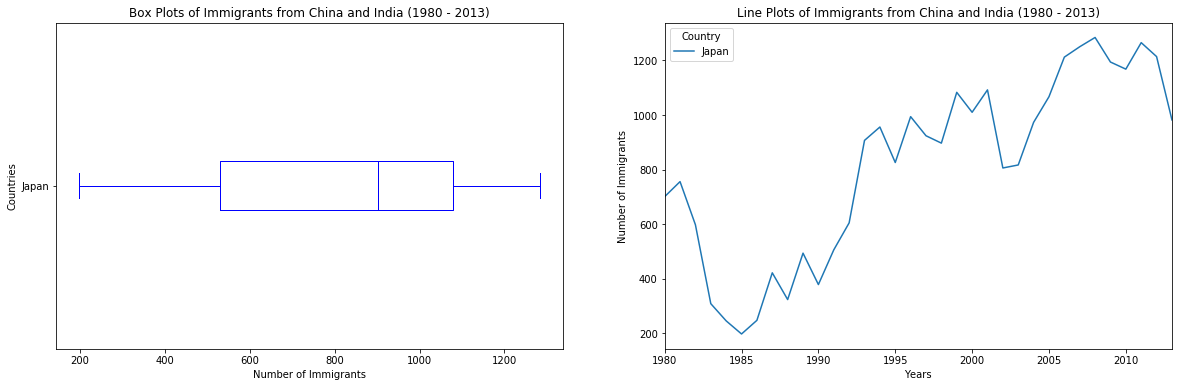

In [86]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 1 (1 row, 2 columns, second plot)

# Subplot 1: Box plot

df_japan.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_japan.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

In [88]:
# Get the top 15 countries based on Total immigrant population.

df_top15 = df_can.sort_values(['Total'], ascending=False, axis=0).head(15)

df_top15

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


In [ ]:
Create a new dataframe which contains the aggregate for each decade. One way to do that:

Create a list of all years in decades 80's, 90's, and 00's.
Slice the original dataframe df_can to create a series for each decade and sum across all years for each country.
Merge the three series into a new data frame. Call your dataframe new_df.

In [100]:
# create a list of all years in decades 80's, 90's, and 00's
years_80s = list(map(str, range(1980, 1990)))
years_90s = list(map(str, range(1990, 2000)))
years_00s = list(map(str, range(2000, 2010)))

# slice the original dataframe to create a series for each decade
df_80s = df_top15.loc[:, years_80s].sum(axis=1)
df_90s = df_top15.loc[:, years_90s].sum(axis=1)
df_00s = df_top15.loc[:, years_00s].sum(axis=1)

# merge the three series into a new data frame
new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s}) 

new_df.head()

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598


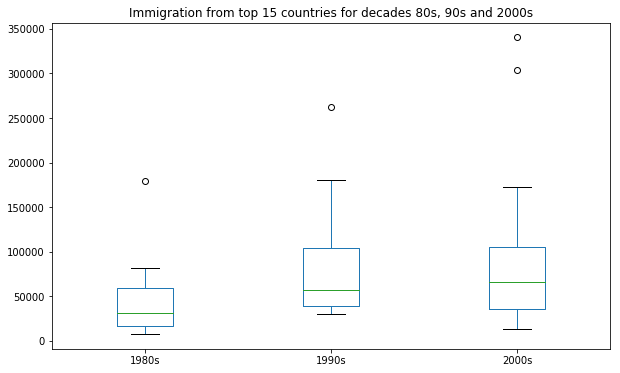

In [103]:
# Plot the box plots
new_df.plot(kind='box', figsize=(10, 6))

plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')

plt.show()

Note how the box plot differs from the summary table created. The box plot scans the data and identifies the outliers. In order to be an outlier, the data value must be:

larger than Q3 by at least 1.5 times the interquartile range (IQR), or,
smaller than Q1 by at least 1.5 times the IQR.
Let's look at decade 2000s as an example: 

Q1 (25%) = 36,101.5 
Q3 (75%) = 105,505.5 
IQR = Q3 - Q1 = 69,404 
Using the definition of outlier, any value that is greater than Q3 by 1.5 times IQR will be flagged as outlier.

Outlier > 105,505.5 + (1.5 * 69,404) 
Outlier > 209,611.5

In [104]:
# let's check how many entries fall above the outlier threshold 
new_df[new_df['2000s']> 209611.5]

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385


In [ ]:
# China and India are both considered as outliers since their population for the decade exceeds 209,611.5

## Scatter Plots

A scatter plot (2D) is a useful method of comparing variables against each other. Scatter plots look similar to line plots in that they both map independent and dependent variables on a 2D graph. While the datapoints are connected together by a line in a line plot, they are not connected in a scatter plot. The data in a scatter plot is considered to express a trend. With further analysis using tools like regression, we can mathematically calculate this relationship and use it to predict trends outside the dataset.

Using a scatter plot, let's visualize the trend of total immigrantion to Canada (all countries combined) for the years 1980 - 2013.

Step 1: Get the dataset. Since we are expecting to use the relationship betewen years and total population, we will convert years to int type.

In [112]:
# we can use the sum() method to get the total population per yeardf_tot 
df_tot = pd.DataFrame(df_continents[years].sum(axis=0))

# change the years to type int (useful for regression later on)
df_tot.index = map(int, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


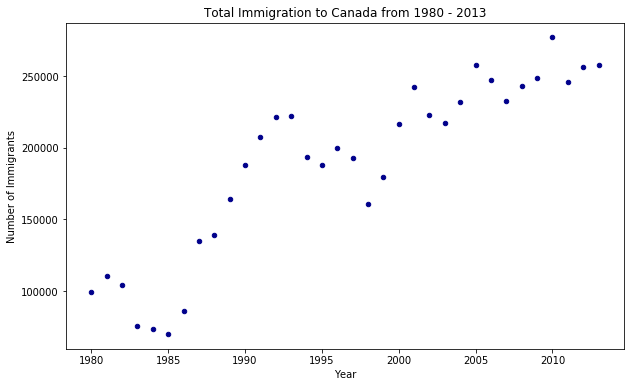

In [113]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

otice how the scatter plot does not connect the datapoints together. We can clearly observe an upward trend in the data: as the years go by, the total number of immigrants increases. We can mathematically analyze this upward trend using a regression line (line of best fit).

So let's try to plot a linear line of best fit, and use it to predict the number of immigrants in 2015.

Step 1: Get the equation of line of best fit. We will use Numpy's polyfit() method by passing in the following:

x: x-coordinates of the data.
y: y-coordinates of the data.
deg: Degree of fitting polynomial. 1 = linear, 2 = quadratic, and so on.

In [114]:
x = df_tot['year']      # year on x-axis
y = df_tot['total']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

The output is an array with the polynomial coefficients, highest powers first. Since we are plotting a linear regression y= a*x + b, our output has 2 elements [5.56709228e+03, -1.09261952e+07] with the the slope in position 0 and intercept in position 1.

Step 2: Plot the regression line on the scatter plot.

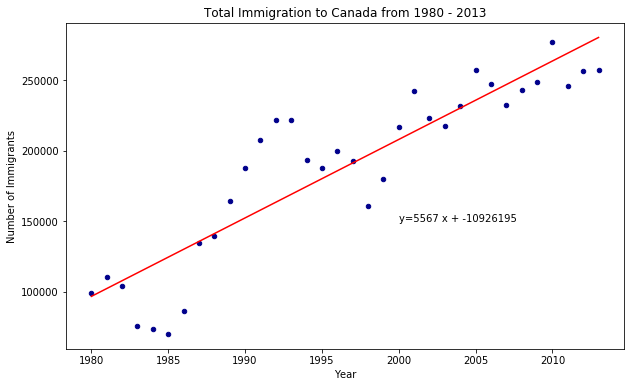

'No. Immigrants = 5567 * Year + -10926195'

In [115]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 

Using the equation of line of best fit, we can estimate the number of immigrants in 2015:

No. Immigrants = 5567 * Year - 10926195
No. Immigrants = 5567 * 2015 - 10926195
No. Immigrants = 291,310

## Bubble Plots

A bubble plot is a variation of the scatter plot that displays three dimensions of data (x, y, z). The datapoints are replaced with bubbles, and the size of the bubble is determined by the third variable 'z', also known as the weight. In maplotlib, we can pass in an array or scalar to the keyword s to plot(), that contains the weight of each point.

In [128]:
# transposed dataframe
df_can_t = df_can[years].transpose()

#cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index) 

# let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

# view the changes
df_can_t.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


There are several methods of normalizations in statistics, each with its own use. In this case, we will use feature scaling to bring all values into the range [0,1]. The general formula is:

In [129]:
# normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

To plot two different scatter plots in one plot, we can include the axes one plot into the other by passing it via the ax parameter.
We will also pass in the weights using the s parameter. Given that the normalized weights are between 0-1, they won't be visible on the plot. Therefore we will:
multiply weights by 2000 to scale it up on the graph, and,
add 10 to compensate for the min value (which has a 0 weight and therefore scale with x2000).

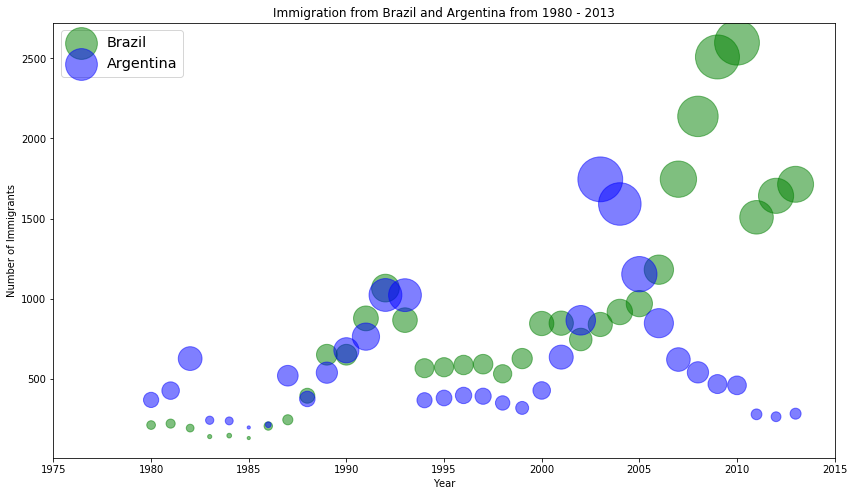

In [138]:
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                   x='Year',
                   y='Brazil',
                   figsize=(14, 8),
                   alpha=0.5,            # transparency
                   color='green',
                   s=norm_brazil * 2000 + 10, # pass in weights 
                   xlim=(1975, 2015))

ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax = ax0)

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 - 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

he size of the bubble corresponds to the magnitude of immigrating population for that year, compared to the 1980 - 2013 data. The larger the bubble, the more immigrants in that year.

From the plot above, we can see a corresponding increase in immigration from Argentina during the 1998 - 2002 great depression. We can also observe a similar spike around 1985 to 1993. In fact, Argentina had suffered a great depression from 1974 - 1990, just before the onset of 1998 - 2002 great depression.

On a similar note, Brazil suffered the Samba Effect where the Brazilian real (currency) dropped nearly 35% in 1999. There was a fear of a South American financial crisis as many South American countries were heavily dependent on industrial exports from Brazil. The Brazilian government subsequently adopted an austerity program, and the economy slowly recovered over the years, culminating in a surge in 2010. The immigration data reflect these events.